In [2]:
#!pip install torch torchvision matplotlib
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=128, shuffle=True)


100%|██████████| 9.91M/9.91M [00:23<00:00, 417kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 41.0kB/s]
100%|██████████| 1.65M/1.65M [00:07<00:00, 218kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.04MB/s]


In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
G = Generator().to(device)
D = Discriminator().to(device)

loss_fn = nn.BCELoss()
opt_G = torch.optim.Adam(G.parameters(), lr=0.0002)
opt_D = torch.optim.Adam(D.parameters(), lr=0.0002)

for epoch in range(30):
    for real_imgs, _ in loader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Train Discriminator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)
        D_real = D(real_imgs)
        D_fake = D(fake_imgs.detach())

        loss_D = loss_fn(D_real, torch.ones_like(D_real)) + \
                 loss_fn(D_fake, torch.zeros_like(D_fake))

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Train Generator
        D_fake = D(fake_imgs)
        loss_G = loss_fn(D_fake, torch.ones_like(D_fake))

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch+1} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")


Epoch 1 | Loss D: 0.0611 | Loss G: 6.3905
Epoch 2 | Loss D: 0.2099 | Loss G: 4.5130
Epoch 3 | Loss D: 0.1697 | Loss G: 5.8174
Epoch 4 | Loss D: 0.7682 | Loss G: 2.7812
Epoch 5 | Loss D: 0.5655 | Loss G: 3.8179
Epoch 6 | Loss D: 0.0562 | Loss G: 5.5924
Epoch 7 | Loss D: 0.0324 | Loss G: 5.1857
Epoch 8 | Loss D: 0.2126 | Loss G: 12.2268
Epoch 9 | Loss D: 0.2315 | Loss G: 6.3059
Epoch 10 | Loss D: 0.3235 | Loss G: 5.5856
Epoch 11 | Loss D: 0.2499 | Loss G: 4.2047
Epoch 12 | Loss D: 0.0759 | Loss G: 4.2336
Epoch 13 | Loss D: 0.2780 | Loss G: 5.9311
Epoch 14 | Loss D: 0.2316 | Loss G: 6.0387
Epoch 15 | Loss D: 0.3699 | Loss G: 8.3091
Epoch 16 | Loss D: 0.1300 | Loss G: 3.9838
Epoch 17 | Loss D: 0.2132 | Loss G: 6.2438
Epoch 18 | Loss D: 0.2209 | Loss G: 4.3690
Epoch 19 | Loss D: 0.1523 | Loss G: 4.7751
Epoch 20 | Loss D: 0.2722 | Loss G: 5.3751
Epoch 21 | Loss D: 0.1642 | Loss G: 5.9082
Epoch 22 | Loss D: 0.3746 | Loss G: 3.9683
Epoch 23 | Loss D: 0.3282 | Loss G: 5.4918
Epoch 24 | Loss D: 

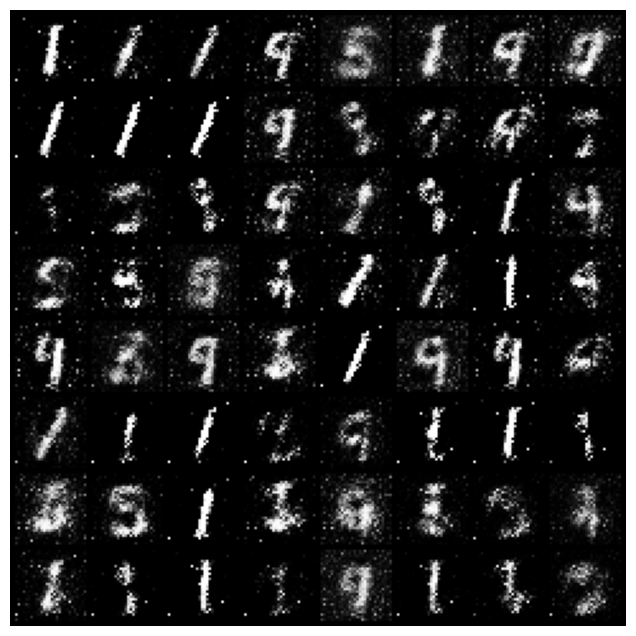

In [6]:
def show_images(images):
    grid = torchvision.utils.make_grid(images, nrow=8, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()

z = torch.randn(64, 100).to(device)
fake_images = G(z)
show_images(fake_images)
